<a href="https://colab.research.google.com/github/arruenicol/challenge_telecom_x_2/blob/main/challenge_telecom_x_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 EXTRACCIÓN

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/df_final.csv')
df.head()

,ID Cliente,Abandono,Género,Ciudadano_Senior,Tiene_Pareja,Dependientes,Meses_Trabajados,Servicio_Telefónico,Líneas_Múltiples,Servicio_Internet,...,Protección_Dispositivo,Soporte Técnico,TV_Streaming,Películas_Streaming,Tipo_Contrato,Factura_Electrónica,Método_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month to month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month to month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month to month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month to month,Yes,Mailed check,83.9,267.40,2.796667


In [104]:
# Ver las columnas disponibles
df.columns

Index(['ID Cliente', 'Abandono', 'Género', 'Ciudadano_Senior', 'Tiene_Pareja',
       'Dependientes', 'Meses_Trabajados', 'Servicio_Telefónico',
       'Líneas_Múltiples', 'Servicio_Internet', 'Seguridad_Online',
       'Respaldo_Online', 'Protección_Dispositivo', 'Soporte Técnico',
       'TV_Streaming', 'Películas_Streaming', 'Tipo_Contrato',
       'Factura_Electrónica', 'Método_Pago', 'Cargos_Mensuales',
       'Cargos_Totales', 'Cuentas_Diarias'],
      dtype='object')

In [105]:
#verificar la estructura general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Cliente              7043 non-null   object 
 1   Abandono                7043 non-null   object 
 2   Género                  7043 non-null   object 
 3   Ciudadano_Senior        7043 non-null   int64  
 4   Tiene_Pareja            7043 non-null   object 
 5   Dependientes            7043 non-null   object 
 6   Meses_Trabajados        7043 non-null   int64  
 7   Servicio_Telefónico     7043 non-null   object 
 8   Líneas_Múltiples        7043 non-null   object 
 9   Servicio_Internet       7043 non-null   object 
 10  Seguridad_Online        7043 non-null   object 
 11  Respaldo_Online         7043 non-null   object 
 12  Protección_Dispositivo  7043 non-null   object 
 13  Soporte Técnico         7043 non-null   object 
 14  TV_Streaming            7043 non-null   

#🛠️ **PREPARACIÓN DE LOS DATOS**

## **Eliminar Columnas Innecesarias y corregir tipos de datos**

In [106]:
#eliminar columnas que no sirven para el análisi
df = df.drop(columns=['ID Cliente'])

In [107]:
#Convertir columnas a binarias

# crear copia limpia
df_clean = df.copy()

# agrupar columnas con "No [...] service"
cols_service = [
    'Líneas_Múltiples',
    'Seguridad_Online', 'Respaldo_Online',
    'Protección_Dispositivo', 'Soporte Técnico',
    'TV_Streaming', 'Películas_Streaming'
]

# reemplazar "No [...] service" por "No"
for col in cols_service:
    df_clean[col] = df_clean[col].replace(['No internet service', 'No phone service'], 'No')

# todas las columnas binarias
cols_yes_no = [
    'Tiene_Pareja', 'Dependientes', 'Servicio_Telefónico',
    'Factura_Electrónica'
] + cols_service

for col in cols_yes_no:
    df_clean[col] = df_clean[col].map({'Yes': 1, 'No': 0})

## **Encoding**

In [108]:
# Encoding
categorical_cols = [
    'Abandono', 'Género', 'Tiene_Pareja', 'Dependientes',
    'Servicio_Telefónico', 'Líneas_Múltiples', 'Servicio_Internet',
    'Seguridad_Online', 'Respaldo_Online', 'Protección_Dispositivo',
    'Soporte Técnico', 'TV_Streaming', 'Películas_Streaming',
    'Tipo_Contrato', 'Factura_Electrónica', 'Método_Pago'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)
df_encoded.head()

,Ciudadano_Senior,Meses_Trabajados,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias,Abandono_Yes,Género_Male,Tiene_Pareja_1,Dependientes_1,Servicio_Telefónico_1,...,Protección_Dispositivo_1,Soporte Técnico_1,TV_Streaming_1,Películas_Streaming_1,Tipo_Contrato_One year,Tipo_Contrato_Two year,Factura_Electrónica_1,Método_Pago_Credit card (automatic),Método_Pago_Electronic check,Método_Pago_Mailed check
0,0,9,65.6,593.30,2.186667,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.9,542.40,1.996667,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,2.463333,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,3.266667,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.9,267.40,2.796667,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


In [109]:
# verificar valores nulos
df_encoded.isnull().sum()

,0
Ciudadano_Senior,0
Meses_Trabajados,0
Cargos_Mensuales,0
Cargos_Totales,11
Cuentas_Diarias,0
Abandono_Yes,0
Género_Male,0
Tiene_Pareja_1,0
Dependientes_1,0
Servicio_Telefónico_1,0


In [110]:
# eliminar la fila con valores nulos y comprobar
df_encoded = df_encoded.dropna(subset=['Cargos_Totales'])
df_encoded.isnull().sum()

,0
Ciudadano_Senior,0
Meses_Trabajados,0
Cargos_Mensuales,0
Cargos_Totales,0
Cuentas_Diarias,0
Abandono_Yes,0
Género_Male,0
Tiene_Pareja_1,0
Dependientes_1,0
Servicio_Telefónico_1,0


# 📝 **ANÁLISIS DE CORRELACIONES**

##**Verificación de la Proporción de Cancelación**

In [111]:
df_encoded['Abandono_Yes'].value_counts(normalize=True)

,proportion
Abandono_Yes,
False,0.734215
True,0.265785


## **Correlación entre las variables**


In [112]:
correlacion = df_encoded.corr()['Abandono_Yes'].sort_values(ascending=False)
print(correlacion)

Abandono_Yes                           1.000000
Servicio_Internet_Fiber optic          0.307463
Método_Pago_Electronic check           0.301455
Cuentas_Diarias                        0.192858
Cargos_Mensuales                       0.192858
Factura_Electrónica_1                  0.191454
Ciudadano_Senior                       0.150541
TV_Streaming_1                         0.063254
Películas_Streaming_1                  0.060860
Líneas_Múltiples_1                     0.040033
Servicio_Telefónico_1                  0.011691
Género_Male                           -0.008545
Protección_Dispositivo_1              -0.066193
Respaldo_Online_1                     -0.082307
Método_Pago_Mailed check              -0.090773
Método_Pago_Credit card (automatic)   -0.134687
Tiene_Pareja_1                        -0.149982
Dependientes_1                        -0.163128
Soporte Técnico_1                     -0.164716
Seguridad_Online_1                    -0.171270
Tipo_Contrato_One year                -0

In [113]:
corr = df_encoded.corr()

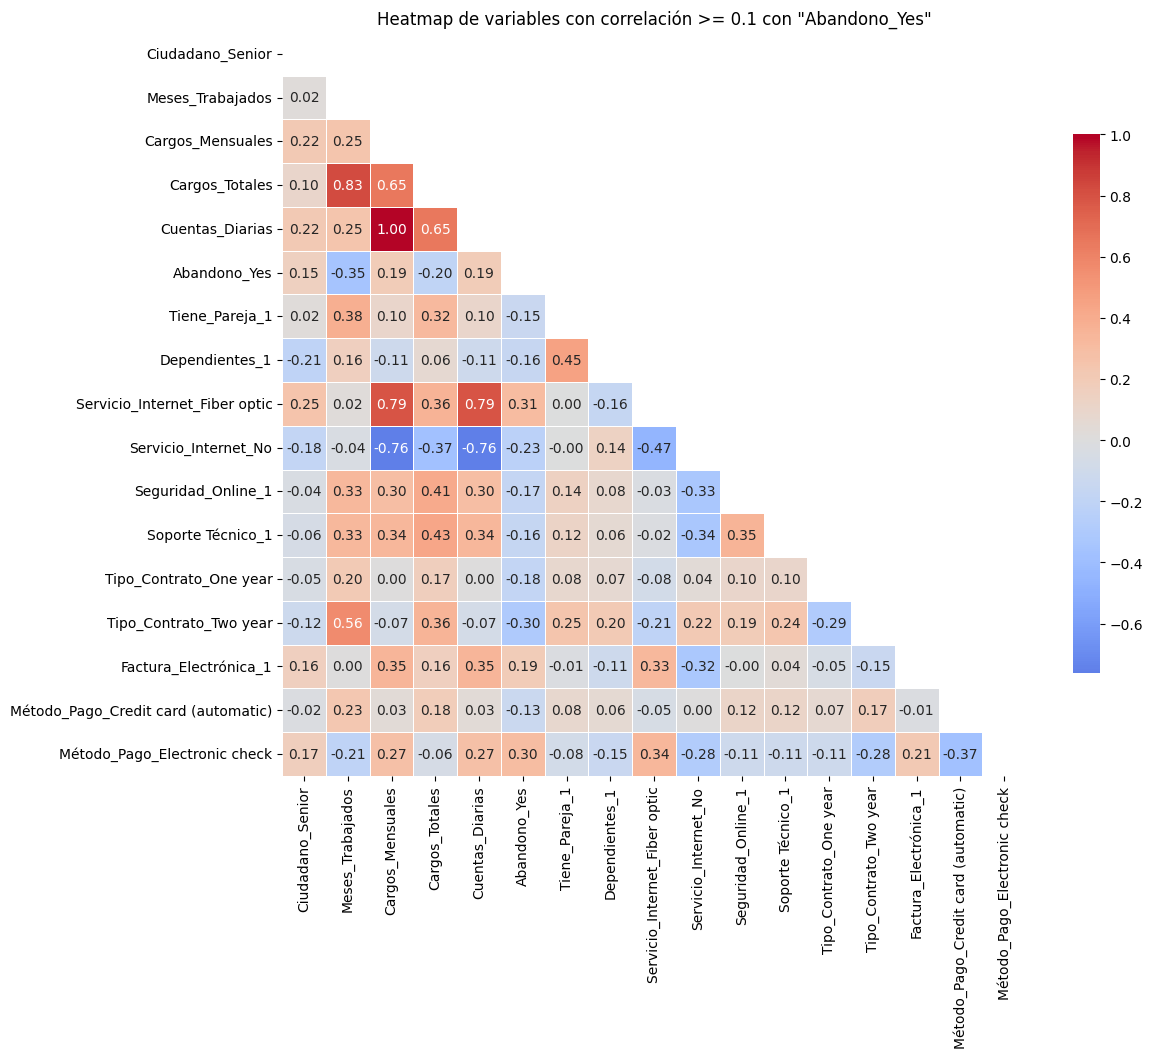

In [114]:
target_var = 'Abandono_Yes'

# definir el umbral mínimo de correlación absoluta para selección
minimo = 0.1

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
var_relevantes = corr.index[abs(corr[target_var]) >= minimo].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in var_relevantes:
    var_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[var_relevantes, var_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {minimo} con "{target_var}"')
plt.show()


###**1. Variables con Correlación Positiva**

| Variable | Correlación | Interpretación |
|----------|-------------|----------------------------|
| Servicio_Internet_Fiber optic | 0.308 | Posibles problemas de servicio, expectativas no cumplidas o precios elevados |
| Método_Pago_Electronic Check | 0.302 | Pagos manuales indican menor compromiso y facilidad para cancelar |
| Cuentas_Diarias/Cargos_Mensuales | 0.193 | Costos más altos generan mayor probabilidad de abandono |
| Factura_Electrónica | 0.192 | Clientes digitales podrían ser más propensos a cambiar de proveedor |
| Ciudadano_Senior | 0.151 | Adultos mayores podrían tener diferentes expectativas de servicio |

###**2. Variables con Correlación Negativa**

| Variable | Correlación | Interpretación |
|----------|-------------|----------------------------|
| Meses_Trabajados | -0.352 | **Factor más importante**: La lealtad se construye con el tiempo |
| Tipo_Contrato_Two year | -0.302 | Contratos largos = mayor retención (compromiso contractual) |
| Servicio_Internet_No | -0.228 | Clientes básicos son más leales (menores expectativas) |
| Cargos_Totales | -0.199 | Clientes que han invertido más tienden a quedarse |
| Tipo_Contrato_One year | -0.178 | Contratos anuales también retienen mejor que mensuales |


###**3. Matriz de correlación**

Del heatmap se observa:

#### **Multicolinealidad Alta:**
- **Cargos_Mensuales ↔ Cuentas_Diarias (1.00)** - Son la misma variable
- **Cargos_Totales ↔ Cargos_Mensuales (0.83)** - Muy relacionadas

#### **Patrones Interesantes:**
- Fibra óptica se correlaciona con cargos altos (0.79)
- Servicios adicionales se correlacionan entre sí (0.30-0.43)
- Contratos largos se asocian con cargos totales altos (0.56)

## 🔍 Análisis de Multicolinealidad


In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [116]:
# variable independiente
X = df_encoded.drop(columns=['Abandono_Yes'])

# constante
X_const = add_constant(X)

In [117]:
X_const = X_const.astype(float)

# calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
3,Cargos_Mensuales,inf
5,Cuentas_Diarias,inf
0,const,629.180624
11,Servicio_Internet_Fiber optic,148.500814
12,Servicio_Internet_No,104.213701
9,Servicio_Telefónico_1,34.893857
18,Películas_Streaming_1,24.156394
17,TV_Streaming_1,24.080019
4,Cargos_Totales,10.811490
2,Meses_Trabajados,7.584453


**VIF REHECHO**

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_filtered = X_const.copy()

X_filtered.drop(columns=["Cuentas_Diarias"], inplace=True)
X_filtered.drop(columns=["Servicio_Internet_No"], inplace=True)

X_filtered = X_filtered.astype(float)

# recalcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]


display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,38.968665
3,Cargos_Mensuales,22.872213
4,Cargos_Totales,10.803153
10,Servicio_Internet_Fiber optic,7.658029
2,Meses_Trabajados,7.583667
18,Tipo_Contrato_Two year,2.648624
16,Películas_Streaming_1,2.458872
15,TV_Streaming_1,2.437465
21,Método_Pago_Electronic check,1.975617
14,Soporte Técnico_1,1.884392


✅ **Problemas Resueltos**

- ❌ **VIF Infinito eliminado** - Ya no hay variables perfectamente colineales
- ✅ **Reducción significativa** - De VIFs de 148+ a máximo 38
- ✅ **Solo 4 variables requieren atención** (vs 8 anteriores)

---

📊 **Estado Actual**

| Categoría VIF | Cantidad | Porcentaje | Variables |
|---------------|----------|------------|-----------|
| 🟢 **VIF < 5** | 18 | **78%** | Mayoría en rango óptimo |
| 🟡 **VIF 5-10** | 2 | **9%** | Aceptables para modelado |
| 🟠 **VIF ≥ 10** | 3 | **13%** | Solo variables monetarias |

---

💰 **Cargos Mensuales  y Totales**

Estas variables monetarias tienen correlación natural debido a su relación matemática:

```
Cargos_Totales = Cargos_Mensuales × Tiempo
```

Sin embargo, es posible simplificar aún más:

**VIF 2**

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# eliminar cargos totales
X_final = X_filtered.drop(columns=["Cargos_Totales"])

# recalcular el VIF
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

display(vif_data_final.sort_values(by="VIF", ascending=False))


,feature,VIF
0,const,31.336459
3,Cargos_Mensuales,22.336364
9,Servicio_Internet_Fiber optic,7.553029
2,Meses_Trabajados,2.826562
17,Tipo_Contrato_Two year,2.630079
15,Películas_Streaming_1,2.417444
14,TV_Streaming_1,2.399620
20,Método_Pago_Electronic check,1.973257
13,Soporte Técnico_1,1.848965
21,Método_Pago_Mailed check,1.837626


# 🤖 **MODELOS PREDICTIVOS**


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

##**Separación de Datos**

In [122]:
X = df_encoded.drop(columns=['Abandono_Yes'])
y = df_encoded['Abandono_Yes']

In [123]:
# datos para entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

##**Normalización con StandarScaler**

In [125]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Balanceo con SMOTE**

In [128]:
smote = SMOTE(random_state=42)
X_train_bl, y_train_bl = smote.fit_resample(X_train_scaled, y_train)

##**Regresión Logística**


In [130]:
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bl, y_train_bl)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regresión Logística
Exactitud: 0.7502369668246446
ROC AUC: 0.8455676654134863
Matriz de Confusión:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



##**Random Forest**

In [131]:
# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bl, y_train_bl)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.7677725118483413
ROC AUC: 0.8188176144922432
Matriz de Confusión:
 [[1297  252]
 [ 238  323]]
              precision    recall  f1-score   support

       False       0.84      0.84      0.84      1549
        True       0.56      0.58      0.57       561

    accuracy                           0.77      2110
   macro avg       0.70      0.71      0.70      2110
weighted avg       0.77      0.77      0.77      2110



=== PREPARACIÓN DE DATOS ===
Forma del dataset: (7032, 24)
Distribución de la variable objetivo:
Abandono_Yes
False    0.734215
True     0.265785
Name: proportion, dtype: float64

Datos después del balanceo:
Distribución balanceada: Abandono_Yes
True     3614
False    3614
Name: count, dtype: int64

=== ENTRENAMIENTO DE MODELOS ===
Entrenando Regresión Logística...
Entrenando Random Forest...
Entrenando KNN...
Entrenando SVM...

=== EVALUACIÓN DE MODELOS ===

=== COMPARACIÓN DE RENDIMIENTO ===
             Modelo Exactitud Precisión Recall F1-Score    AUC
Regresión Logística    0.7502    0.5195 0.8093   0.6328 0.8456
      Random Forest    0.7834    0.6209 0.4759   0.5388 0.8185
                KNN    0.6953    0.4540 0.7219   0.5575 0.7562
                SVM    0.7536    0.5272 0.7094   0.6049 0.8229


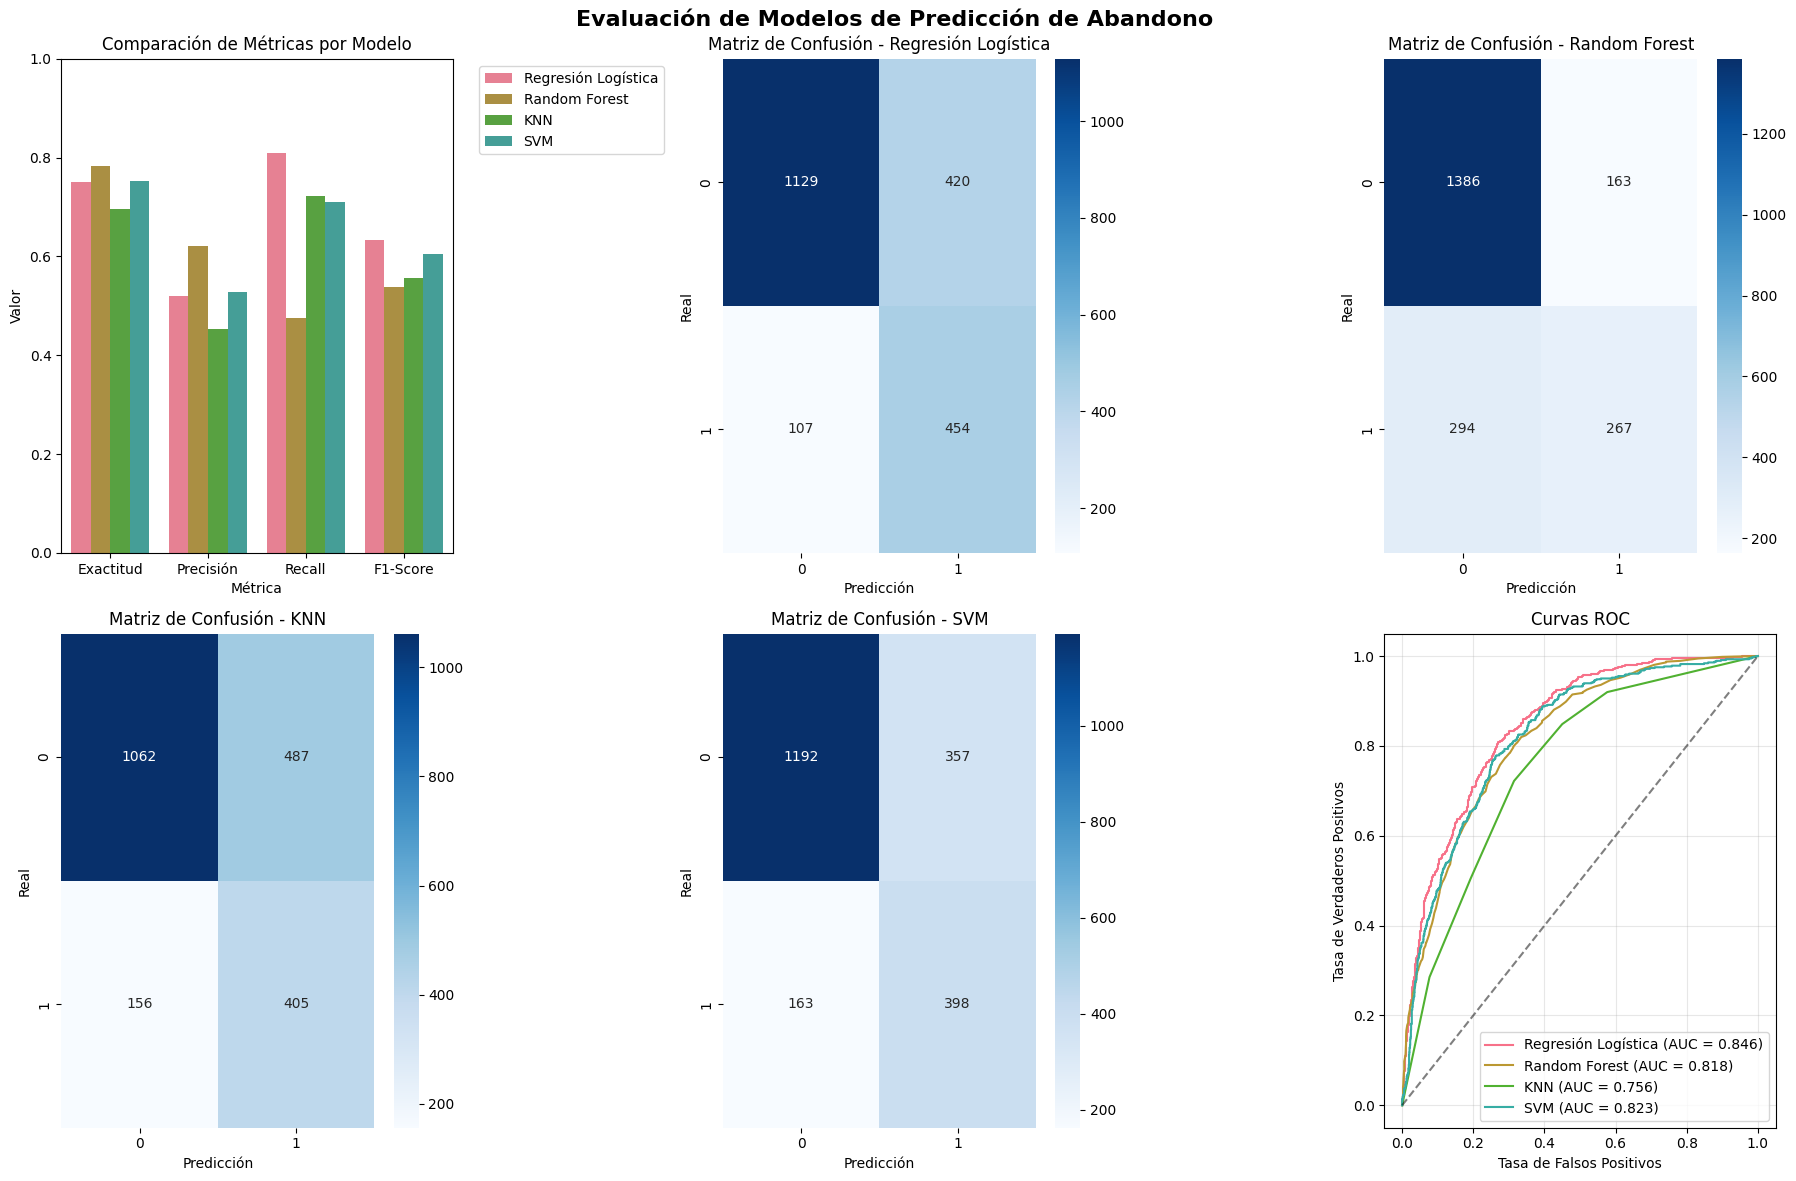


=== ANÁLISIS DE IMPORTANCIA DE VARIABLES ===

1. REGRESIÓN LOGÍSTICA - Análisis de Coeficientes


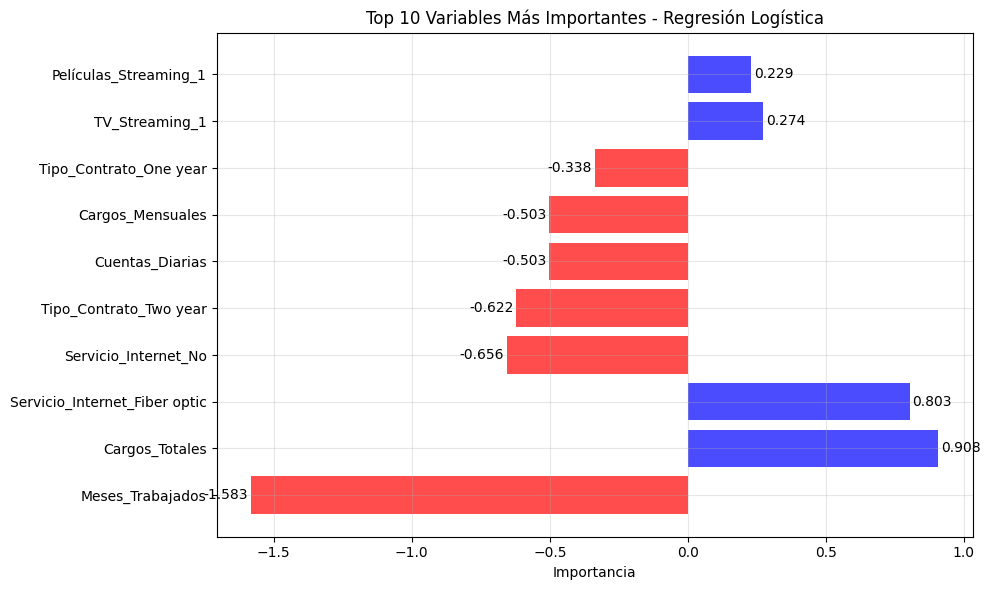

Top 10 variables más importantes (Regresión Logística):
                     variable  importancia
             Meses_Trabajados    -1.582806
               Cargos_Totales     0.907824
Servicio_Internet_Fiber optic     0.803378
         Servicio_Internet_No    -0.656099
       Tipo_Contrato_Two year    -0.621736
              Cuentas_Diarias    -0.502948
             Cargos_Mensuales    -0.502948
       Tipo_Contrato_One year    -0.337674
               TV_Streaming_1     0.273626
        Películas_Streaming_1     0.229036

2. RANDOM FOREST - Importancia de Variables


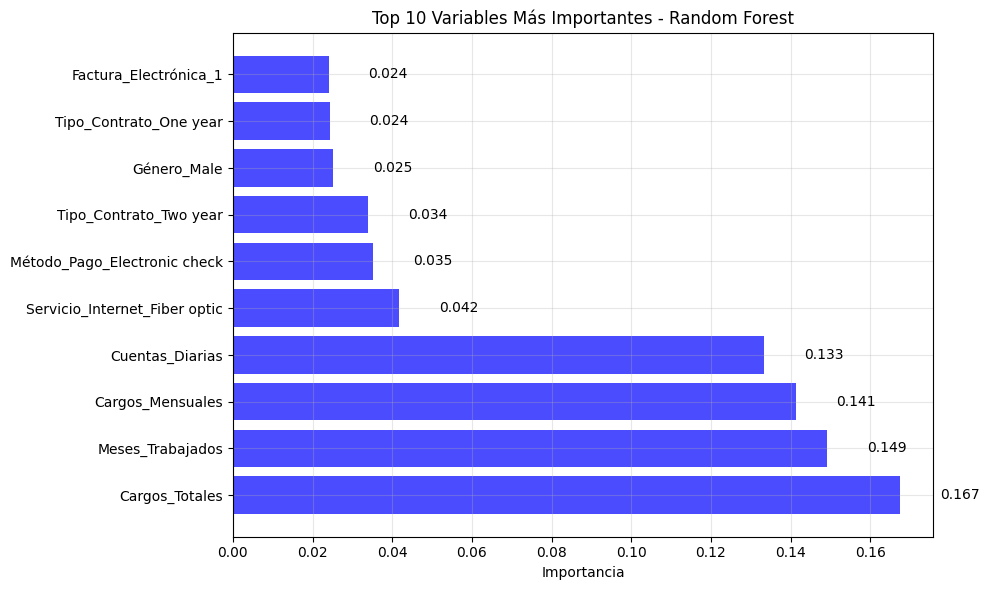

Top 10 variables más importantes (Random Forest):
                     variable  importancia
               Cargos_Totales     0.167414
             Meses_Trabajados     0.149252
             Cargos_Mensuales     0.141377
              Cuentas_Diarias     0.133359
Servicio_Internet_Fiber optic     0.041787
 Método_Pago_Electronic check     0.035181
       Tipo_Contrato_Two year     0.033937
                  Género_Male     0.025236
       Tipo_Contrato_One year     0.024299
        Factura_Electrónica_1     0.024059

=== ANÁLISIS CRÍTICO ===
✅ MEJOR MODELO: Regresión Logística
   - F1-Score: 0.6328
   - Exactitud: 0.7502
   - Precisión: 0.5195
   - Recall: 0.8093

📊 INTERPRETACIÓN DE RESULTADOS:
- Exactitud: Porcentaje de predicciones correctas
- Precisión: De los clientes que predecimos que abandonarían, ¿cuántos realmente lo hicieron?
- Recall: De todos los clientes que realmente abandonaron, ¿cuántos identificamos correctamente?
- F1-Score: Equilibrio entre precisión y recall

🔍 DE

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report,
                           roc_auc_score, roc_curve)
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Configuración para visualizaciones
plt.style.use('default')
sns.set_palette("husl")

# ===============================
# 1. PREPARACIÓN DE DATOS
# ===============================

# Asumiendo que ya tienes df_encoded y las variables X, y definidas
# X = df_encoded.drop(columns=['Abandono_Yes'])
# y = df_encoded['Abandono_Yes']

print("=== PREPARACIÓN DE DATOS ===")
print(f"Forma del dataset: {X.shape}")
print(f"Distribución de la variable objetivo:")
print(y.value_counts(normalize=True))

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Normalización (para modelos que la requieren)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balanceo de clases con SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"\nDatos después del balanceo:")
print(f"Distribución balanceada: {pd.Series(y_train_balanced).value_counts()}")

# ===============================
# 2. CREACIÓN DE MODELOS
# ===============================

print("\n=== ENTRENAMIENTO DE MODELOS ===")

# Diccionario para almacenar modelos y resultados
models = {}
results = {}

# MODELO 1: Regresión Logística (requiere normalización)
print("Entrenando Regresión Logística...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_balanced, y_train_balanced)
models['Logistic_Regression'] = lr_model

# MODELO 2: Random Forest (no requiere normalización)
print("Entrenando Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Usando datos sin normalizar
models['Random_Forest'] = rf_model

# MODELO 3: KNN (requiere normalización)
print("Entrenando KNN...")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_balanced, y_train_balanced)
models['KNN'] = knn_model

# MODELO 4: SVM (requiere normalización)
print("Entrenando SVM...")
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_balanced, y_train_balanced)
models['SVM'] = svm_model

# ===============================
# 3. FUNCIÓN DE EVALUACIÓN
# ===============================

def evaluate_model(model, X_test_data, y_test, model_name):
    """
    Evalúa un modelo y retorna las métricas
    """
    # Predicciones
    y_pred = model.predict(X_test_data)
    y_prob = model.predict_proba(X_test_data)[:, 1] if hasattr(model, 'predict_proba') else None

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc': auc,
        'confusion_matrix': cm,
        'predictions': y_pred,
        'probabilities': y_prob
    }

# ===============================
# 4. EVALUACIÓN DE MODELOS
# ===============================

print("\n=== EVALUACIÓN DE MODELOS ===")

# Evaluar cada modelo
results['Logistic_Regression'] = evaluate_model(
    models['Logistic_Regression'], X_test_scaled, y_test, 'Regresión Logística'
)

results['Random_Forest'] = evaluate_model(
    models['Random_Forest'], X_test, y_test, 'Random Forest'
)

results['KNN'] = evaluate_model(
    models['KNN'], X_test_scaled, y_test, 'KNN'
)

results['SVM'] = evaluate_model(
    models['SVM'], X_test_scaled, y_test, 'SVM'
)

# ===============================
# 5. COMPARACIÓN DE MODELOS
# ===============================

print("\n=== COMPARACIÓN DE RENDIMIENTO ===")

# Crear DataFrame con métricas
metrics_df = pd.DataFrame([
    {
        'Modelo': result['model_name'],
        'Exactitud': f"{result['accuracy']:.4f}",
        'Precisión': f"{result['precision']:.4f}",
        'Recall': f"{result['recall']:.4f}",
        'F1-Score': f"{result['f1_score']:.4f}",
        'AUC': f"{result['auc']:.4f}" if result['auc'] else 'N/A'
    }
    for result in results.values()
])

print(metrics_df.to_string(index=False))

# ===============================
# 6. VISUALIZACIONES
# ===============================

# Crear visualizaciones
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Evaluación de Modelos de Predicción de Abandono', fontsize=16, fontweight='bold')

# Gráfico de métricas
ax1 = axes[0, 0]
metrics_numeric = pd.DataFrame([
    {
        'Modelo': result['model_name'],
        'Exactitud': result['accuracy'],
        'Precisión': result['precision'],
        'Recall': result['recall'],
        'F1-Score': result['f1_score']
    }
    for result in results.values()
])

metrics_melted = metrics_numeric.melt(id_vars=['Modelo'], var_name='Métrica', value_name='Valor')
sns.barplot(data=metrics_melted, x='Métrica', y='Valor', hue='Modelo', ax=ax1)
ax1.set_title('Comparación de Métricas por Modelo')
ax1.set_ylim(0, 1)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Matrices de confusión
model_names = list(results.keys())
for i, (key, result) in enumerate(results.items()):
    row = (i + 1) // 3
    col = (i + 1) % 3
    if row < 2:
        ax = axes[row, col]
        sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_title(f'Matriz de Confusión - {result["model_name"]}')
        ax.set_xlabel('Predicción')
        ax.set_ylabel('Real')

# Curvas ROC
ax_roc = axes[1, 2]
for key, result in results.items():
    if result['probabilities'] is not None:
        fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
        ax_roc.plot(fpr, tpr, label=f"{result['model_name']} (AUC = {result['auc']:.3f})")

ax_roc.plot([0, 1], [0, 1], 'k--', alpha=0.5)
ax_roc.set_xlabel('Tasa de Falsos Positivos')
ax_roc.set_ylabel('Tasa de Verdaderos Positivos')
ax_roc.set_title('Curvas ROC')
ax_roc.legend()
ax_roc.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ===============================
# 7. ANÁLISIS DE IMPORTANCIA DE VARIABLES
# ===============================

print("\n=== ANÁLISIS DE IMPORTANCIA DE VARIABLES ===")

def plot_feature_importance(importances, feature_names, model_name, top_n=10):
    """
    Grafica la importancia de las variables
    """
    # Crear DataFrame y ordenar
    imp_df = pd.DataFrame({
        'variable': feature_names,
        'importancia': importances
    }).sort_values('importancia', key=abs, ascending=False)

    # Tomar las top_n variables
    top_features = imp_df.head(top_n)

    # Crear gráfico
    plt.figure(figsize=(10, 6))
    colors = ['red' if x < 0 else 'blue' for x in top_features['importancia']]
    bars = plt.barh(range(len(top_features)), top_features['importancia'], color=colors, alpha=0.7)

    plt.yticks(range(len(top_features)), top_features['variable'])
    plt.xlabel('Importancia')
    plt.title(f'Top {top_n} Variables Más Importantes - {model_name}')
    plt.grid(True, alpha=0.3)

    # Añadir valores en las barras
    for i, (bar, val) in enumerate(zip(bars, top_features['importancia'])):
        plt.text(val + (0.01 if val >= 0 else -0.01), i, f'{val:.3f}',
                ha='left' if val >= 0 else 'right', va='center')

    plt.tight_layout()
    plt.show()

    return top_features

# Análisis para cada modelo

# 1. REGRESIÓN LOGÍSTICA - Coeficientes
print("\n1. REGRESIÓN LOGÍSTICA - Análisis de Coeficientes")
lr_coef = models['Logistic_Regression'].coef_[0]
lr_top_features = plot_feature_importance(lr_coef, X.columns, 'Regresión Logística')
print("Top 10 variables más importantes (Regresión Logística):")
print(lr_top_features.to_string(index=False))

# 2. RANDOM FOREST - Importancia de variables
print("\n2. RANDOM FOREST - Importancia de Variables")
rf_importance = models['Random_Forest'].feature_importances_
rf_top_features = plot_feature_importance(rf_importance, X.columns, 'Random Forest')
print("Top 10 variables más importantes (Random Forest):")
print(rf_top_features.to_string(index=False))

# ===============================
# 8. ANÁLISIS CRÍTICO Y RECOMENDACIONES
# ===============================

print("\n=== ANÁLISIS CRÍTICO ===")

# Encontrar el mejor modelo basado en F1-score (equilibra precisión y recall)
best_model_key = max(results.keys(), key=lambda x: results[x]['f1_score'])
best_model_result = results[best_model_key]

print(f"✅ MEJOR MODELO: {best_model_result['model_name']}")
print(f"   - F1-Score: {best_model_result['f1_score']:.4f}")
print(f"   - Exactitud: {best_model_result['accuracy']:.4f}")
print(f"   - Precisión: {best_model_result['precision']:.4f}")
print(f"   - Recall: {best_model_result['recall']:.4f}")

print("\n📊 INTERPRETACIÓN DE RESULTADOS:")
print("- Exactitud: Porcentaje de predicciones correctas")
print("- Precisión: De los clientes que predecimos que abandonarían, ¿cuántos realmente lo hicieron?")
print("- Recall: De todos los clientes que realmente abandonaron, ¿cuántos identificamos correctamente?")
print("- F1-Score: Equilibrio entre precisión y recall")

print("\n🔍 DETECCIÓN DE OVERFITTING/UNDERFITTING:")

# Evaluar en datos de entrenamiento para detectar overfitting
print("\nComparación Entrenamiento vs Prueba:")
for key, model in models.items():
    if key in ['Logistic_Regression', 'KNN', 'SVM']:
        train_pred = model.predict(X_train_balanced)
        train_acc = accuracy_score(y_train_balanced, train_pred)
    else:  # Random Forest
        train_pred = model.predict(X_train)
        train_acc = accuracy_score(y_train, train_pred)

    test_acc = results[key]['accuracy']
    diff = train_acc - test_acc

    print(f"{results[key]['model_name']}:")
    print(f"  - Exactitud Entrenamiento: {train_acc:.4f}")
    print(f"  - Exactitud Prueba: {test_acc:.4f}")
    print(f"  - Diferencia: {diff:.4f}")

    if diff > 0.1:
        print(f"  ⚠️  Posible OVERFITTING (diferencia > 0.1)")
    elif test_acc < 0.6:
        print(f"  ⚠️  Posible UNDERFITTING (exactitud baja)")
    else:
        print(f"  ✅ Buen equilibrio")
    print()

print("\n💡 RECOMENDACIONES:")
print("1. Para reducir overfitting: Usar regularización, más datos o modelos más simples")
print("2. Para reducir underfitting: Aumentar complejidad del modelo o mejorar features")
print("3. El modelo con mejor F1-Score es recomendado para producción")
print("4. Considerar el costo de falsos positivos vs falsos negativos según el negocio")

# ===============================
# 9. RESUMEN EJECUTIVO
# ===============================

print("\n" + "="*50)
print("📋 RESUMEN EJECUTIVO")
print("="*50)

print(f"\n🏆 MODELO RECOMENDADO: {best_model_result['model_name']}")
print(f"📈 Métricas del modelo seleccionado:")
print(f"   • Exactitud: {best_model_result['accuracy']:.1%}")
print(f"   • Precisión: {best_model_result['precision']:.1%}")
print(f"   • Recall: {best_model_result['recall']:.1%}")
print(f"   • F1-Score: {best_model_result['f1_score']:.1%}")

print(f"\n🔑 FACTORES CLAVE DE ABANDONO:")
if best_model_key == 'Random_Forest':
    top_3 = rf_top_features.head(3)
else:
    top_3 = lr_top_features.head(3)

for i, (_, row) in enumerate(top_3.iterrows(), 1):
    print(f"   {i}. {row['variable']}: {row['importancia']:.3f}")

print(f"\n📊 INTERPRETACIÓN:")
print(f"El modelo {best_model_result['model_name']} puede identificar correctamente")
print(f"{best_model_result['recall']:.1%} de los clientes que realmente abandonarán,")
print(f"con una precisión del {best_model_result['precision']:.1%}.")

print("\n" + "="*50)